### Data exploration - the following section inspects the data format, count, shape and also visualize a sample of it per data set. When adding a new dataset, it is only required to add its path to have it visualized in the same manner awell

dataset  GTI_Far contains 834  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI_Left contains 909  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI_Right contains 664  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI_MiddleClose contains 419  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  KITTI_extracted contains 5966  cars 
of size:  (64, 64, 3)  and data type: float32
dataset  GTI contains  3900  non cars 
of size:  (64, 64, 3)  and data type: float32
dataset  Extras contains  5068  non cars 
of size:  (64, 64, 3)  and data type: float32
There are total  8792 number of cars. And a total of  8968  number of non cars.


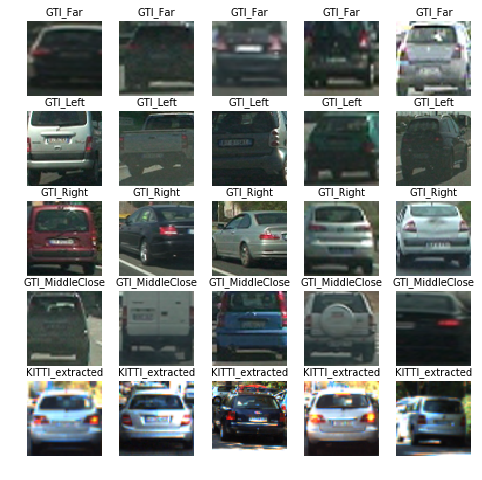

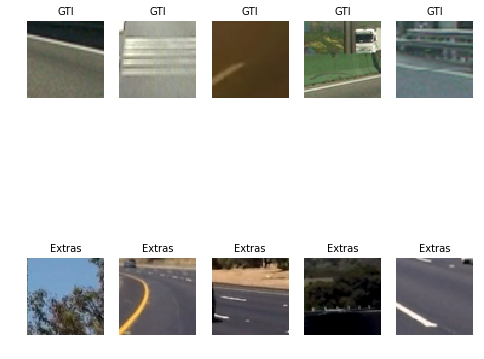

In [1]:
#Data exploration
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
%matplotlib inline 


# Define a function to return some characteristics of the dataset 
def data_peek(data_paths):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["count"] = len(data_paths)
    # Read in a test image
    example_img = mpimg.imread(data_paths[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

    
car_data_sets = ["./dataset/vehicles/GTI_Far", "./dataset/vehicles/GTI_Left", "./dataset/vehicles/GTI_Right",
                   "./dataset/vehicles/GTI_MiddleClose", "./dataset/vehicles/KITTI_extracted"]

non_car_data_sets = ["./dataset/non-vehicles/GTI", "./dataset/non-vehicles/Extras"]


all_cars = []
total_cars_size = 0

#Amount of images to visualize per data set
visualize_number = 5

fig, axs = plt.subplots(len(car_data_sets), visualize_number, figsize=(8, 8))
axs = axs.ravel()

#First for each data set we calculate stats as the number of images in it, their shape and type
#Then we sample and visualize few images per data folder.
for index, dataset in enumerate(car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    all_cars.append(paths)
    name = dataset.split("/")[-1]
    data_info = data_peek(paths)
    total_cars_size += data_info["count"]
    print('dataset ', name, "contains",
      data_info["count"], ' cars ')
    print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
    
    for i in range(visualize_number): 
        example_ind = np.random.randint(0, data_info["count"])
        example_img = mpimg.imread(paths[example_ind])
        num = index * visualize_number + i
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(example_img)


all_non_cars = []
total_non_cars_size = 0

fig, axs = plt.subplots(len(non_car_data_sets), visualize_number, figsize=(8, 8))
axs = axs.ravel()

#First for each data set we calculate stats as the number of images in it, their shape and type
#Then we sample and visualize few images per data folder.
for index, dataset in enumerate(non_car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    all_non_cars.append(paths)
    name = dataset.split("/")[-1]
    data_info = data_peek(paths)
    total_non_cars_size += data_info["count"]
    print('dataset ', name, "contains ",
      data_info["count"], ' non cars ')
    print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"]) 
    
    for i in range(visualize_number): 
        example_ind = np.random.randint(0, data_info["count"])
        example_img = mpimg.imread(paths[example_ind])

        num = index * visualize_number + i
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(example_img)

        
all_cars = np.hstack(all_cars)
all_non_cars = np.hstack(all_non_cars)
print("There are total ", total_cars_size, "number of cars. And a total of ", total_non_cars_size, " number of non cars.")

    



In [2]:
#Importing utils.py, util code that is responsible for most of the heavy lifting done in this notebook
import utils

## The cell below explores the hog features extraction, playing with its hyperparameters and visualizes the result

C:\AI\Anaconda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


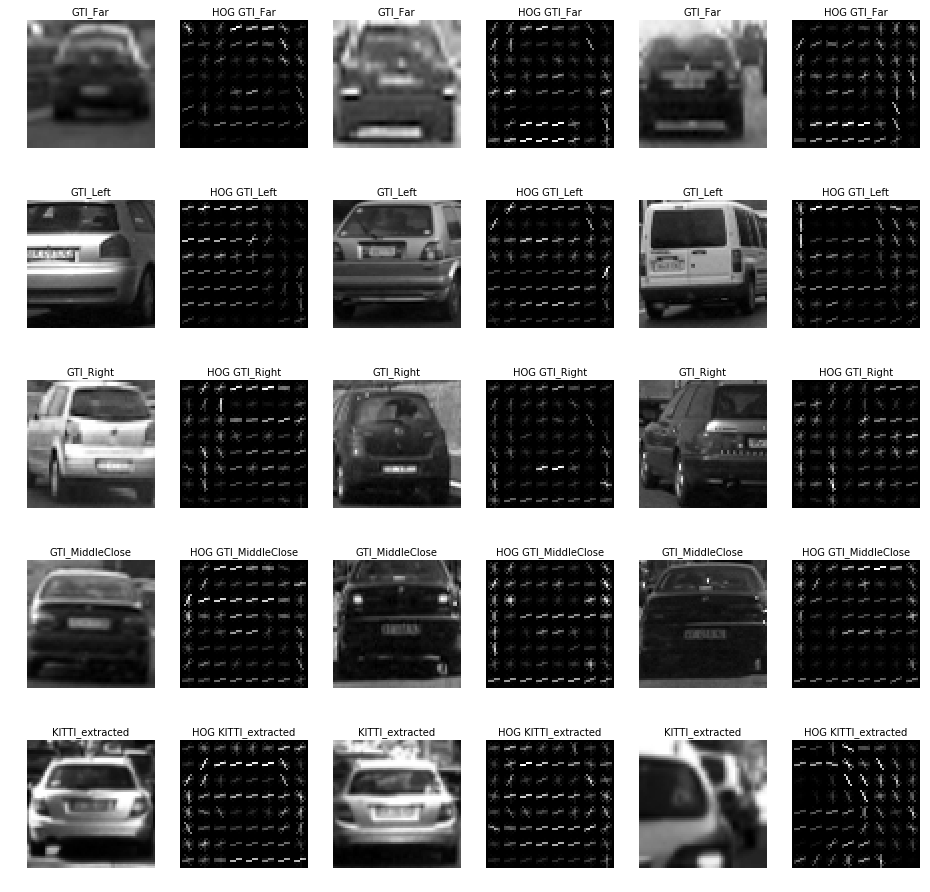

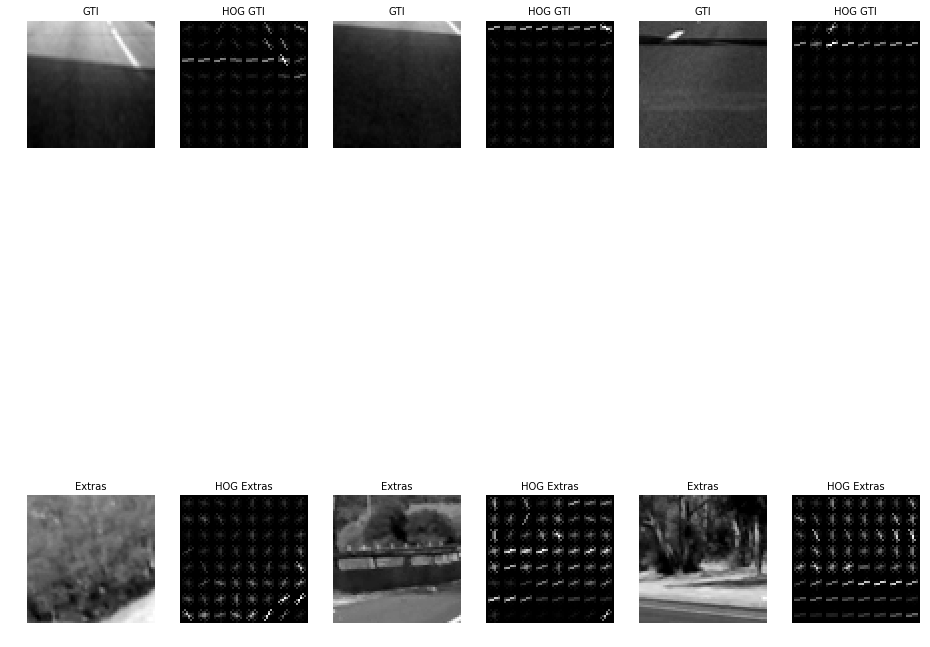

In [3]:
#Visualize HOG

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2


visualize_number = 3
fig, axs = plt.subplots(len(car_data_sets), visualize_number * 2, figsize=(16, 16))
axs = axs.ravel()

#First for each car data set we sample few image, and extract the hog features, and visualize them.
for index, dataset in enumerate(car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    name = dataset.split("/")[-1]

    for i in range(visualize_number): 
        example_ind = np.random.randint(0, len(paths))
        example_img = mpimg.imread(paths[example_ind])
    
        gray = cv2.cvtColor(example_img, cv2.COLOR_RGB2GRAY)
        
        # Call our function with vis=True to see an image output
        features, hog_image = utils.get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
        
        num = (index * visualize_number + i) * 2
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(gray, cmap='gray')
        
        axs[num + 1].set_title("HOG " + name , fontsize=10)
        axs[num + 1].axis('off')
        axs[num + 1].imshow(hog_image, cmap='gray')

fig, axs = plt.subplots(len(non_car_data_sets), visualize_number * 2, figsize=(16, 16))
axs = axs.ravel()

#First for each non car data set we sample few image, and extract the hog features, and visualize them.
for index, dataset in enumerate(non_car_data_sets):
    paths = glob.glob(dataset + '/*.png')
    name = dataset.split("/")[-1]

    for i in range(visualize_number): 
        example_ind = np.random.randint(0, len(paths))
        example_img = mpimg.imread(paths[example_ind])
    
        gray = cv2.cvtColor(example_img, cv2.COLOR_RGB2GRAY)
        
        # Call our function with vis=True to see an image output
        features, hog_image = utils.get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
        
        num = (index * visualize_number + i) * 2
        axs[num].set_title(name, fontsize=10)
        axs[num].axis('off')
        axs[num].imshow(gray, cmap='gray')
        
        axs[num + 1].set_title("HOG " + name , fontsize=10)
        axs[num + 1].axis('off')
        axs[num + 1].imshow(hog_image, cmap='gray')        
        
        


## The section below defines the hyperparameters eventually will be used to train our model.

In [4]:
#Training Hyperparameters
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 13  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()
test_set_size = 0.2

In [5]:
#search and classify
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
    
    

cars = all_cars
notcars = all_non_cars

#Extracting features for cars data, using hypterparams defined above
car_features = utils.extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, cbins_range=(0,1),
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

#Extracting features for non cars data, using hypterparams defined above
notcar_features = utils.extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, cbins_range=(0,1),
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

#Creating a feature vector 
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=test_set_size, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()




C:\AI\Anaconda\envs\carnd-term1\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\AI\Anaconda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 13 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 1404
2.79 Seconds to train SVC...
Test Accuracy of SVC =  0.9772


### find_cars will use a given trained model, scaling function used on training data, hyperparams and image range to search for cars in an input image
### For any detected car, if any, a bounding box will be added to returned list of bounding boxes.

In [6]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell,
              cell_per_block, spatial_size, hist_bins, hog_channel=hog_channel, color_space=color_space, spatial_feat=True, 
                        hist_feat=True, hog_feat=True):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
        
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = utils.convert_color(img_tosearch, color_space)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    
    if (hog_channel == "ALL"):
        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]
    else:
        ch1 = ctrans_tosearch[:,:,hog_channel]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = utils.get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    if(hog_channel == "ALL"):
        hog2 = utils.get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = utils.get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    output_boxes = []

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            if(hog_channel == "ALL"):
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            else: hog_features = hog_feat1

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            features = []
            # Get color features
            if(spatial_feat == True):
                spatial_features = utils.bin_spatial(subimg, size=spatial_size)
                features.append(spatial_features)
            if(hist_feat == True):
                hist_features = utils.color_hist(subimg, nbins=hist_bins)
                features.append(hist_features)
            if(hog_feat == True):
                features.append(hog_features)

            all_features = np.concatenate(features)
            # Scale features and make a prediction
            test_features = X_scaler.transform(all_features.reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                output_boxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return output_boxes

C:\AI\Anaconda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\AI\Anaconda\envs\carnd-term1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


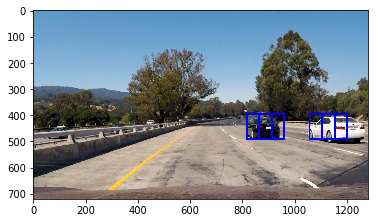

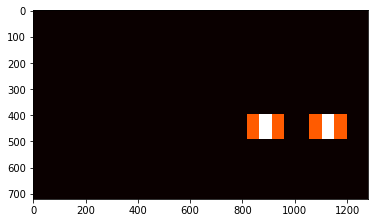

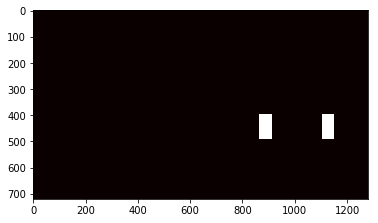

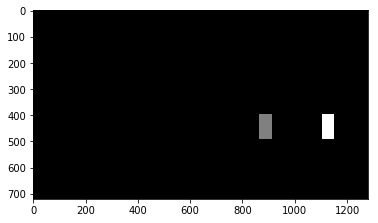

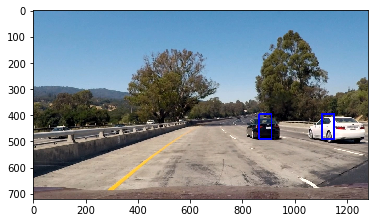

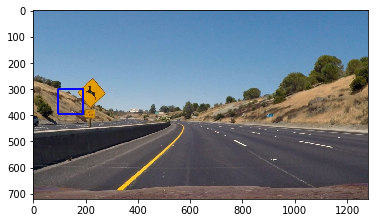

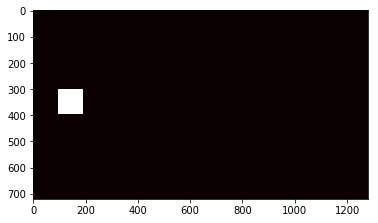

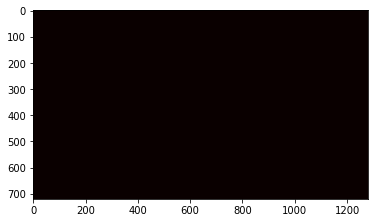

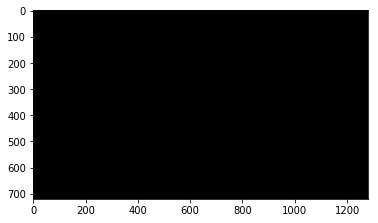

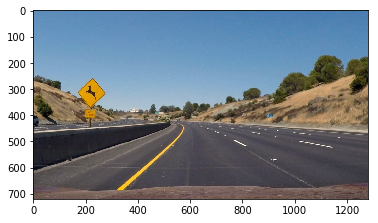

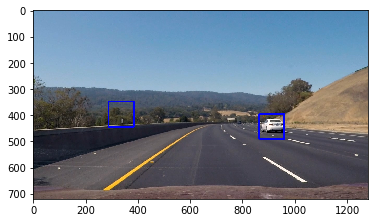

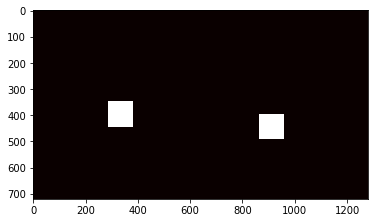

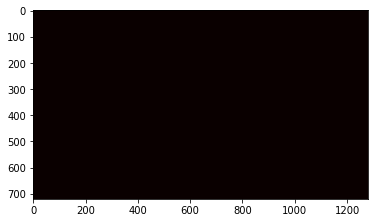

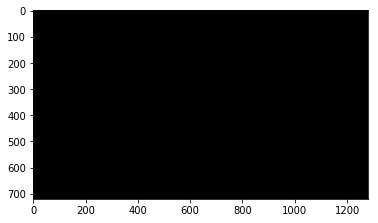

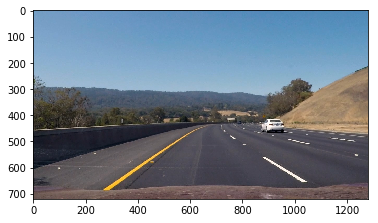

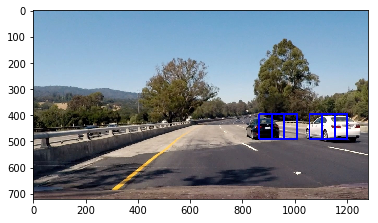

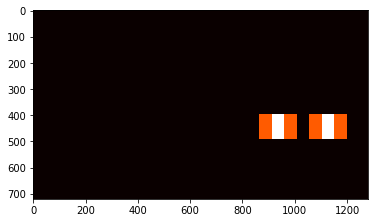

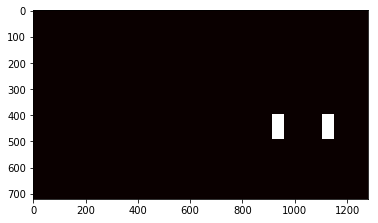

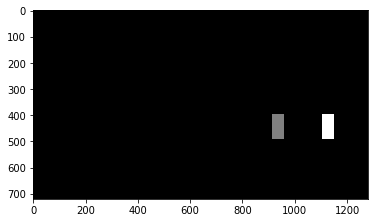

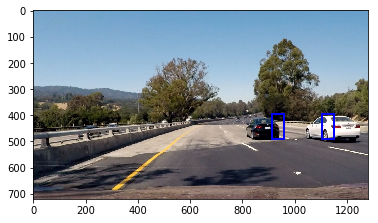

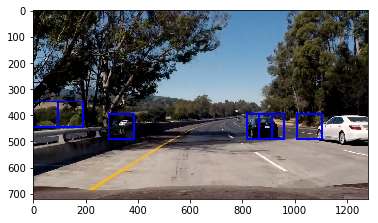

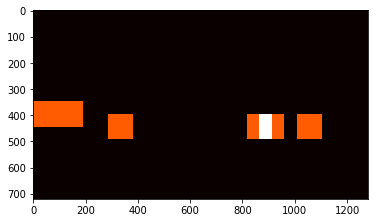

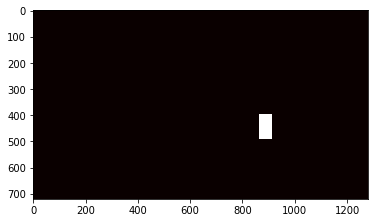

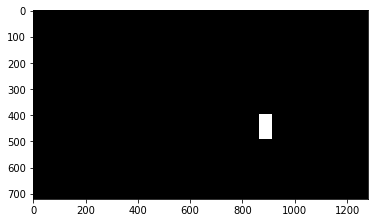

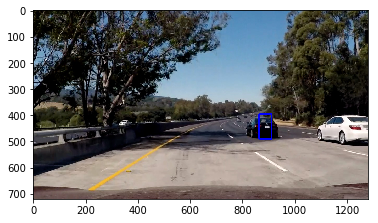

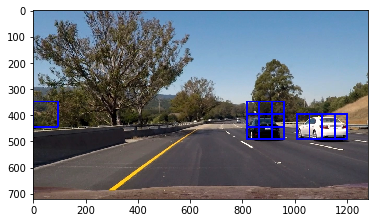

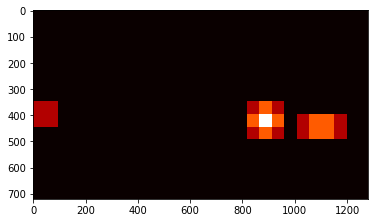

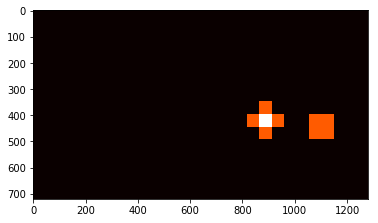

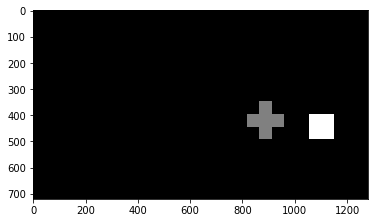

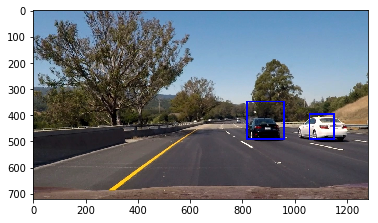

In [7]:
from scipy.ndimage.measurements import label

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

ystart = 300
ystop = 656
scale = 1.5
    
test_images_paths =  glob.glob('./test_images/*.jpg')

#Trying the trained model on same test images. At this point we use a single scale box scanning of the image, and use
#a threshold of 1 for the heatmap.
for test_image in test_images_paths:
    img = mpimg.imread(test_image)

    plt.figure()
    #Use trained model to look for cars in the image, use a single scale.
    boxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block
                        ,spatial_size, hist_bins, hog_channel,color_space, spatial_feat, hist_feat, hog_feat)
    with_boxes = utils.draw_boxes(img, boxes)
    plt.imshow(with_boxes)
    
    #Calculate a heatmap image from the resulting bounding boxes found by the model
    test_heatmap = np.zeros_like(img[:,:,0])
    heatmap = utils.add_heat(test_heatmap, boxes)
    plt.figure()
    plt.imshow(heatmap, cmap='hot')
    
    #Threshold the heatmap according to # of finding per pixel.
    thresholded = utils.apply_threshold(heatmap, 1)
    plt.figure()
    plt.imshow(thresholded, cmap='hot')
    
    #Label the thresholded heatpamp to create a coherent bounding shape
    labeled = label(thresholded)
    plt.figure()
    plt.imshow(labeled[0], cmap='gray')
    
    # Draw bounding boxes on a copy of the image
    bounding_box_image = draw_labeled_bboxes(np.copy(img), labeled)
    # Display the image
    plt.figure()
    plt.imshow(bounding_box_image)

### The class below is used to keep state of bounding boxes between images when dealing with car detection in videos, where it makes sense to assume/predict cars location are close per frame in the video (assuming linear motion without skips.) This helps with robustness and also with eliminating false positives that appear in one frame and not in the next

In [8]:
#Keeps a list of bounding boxes, upto to history_length parameter
class Multiple_Frames_State():
    def __init__ (self, history_length):
        self.list_length = history_length 
        self.frame_boxes = []

    def add_frame_boxes(self, boxes):
        self.frame_boxes.append(boxes)
        if len(self.frame_boxes) > self.list_length:
            self.frame_boxes = self.frame_boxes[len(self.frame_boxes) - self.list_length:]    
            
    def get_frame_boxes(self):
        return self.frame_boxes

### The car detection pipeline below is basically using the trained model and find_cars method on an input image but using multiple box scales for scanning the input image for cars. We use the fact that in perspective view objects  that are far away looks smaller, and use smaller scale boxes further from the camera, and larger scale for close by regions

In [9]:
def car_detection_pipeline(svc, X_scaler, orient, pix_per_cell,
              cell_per_block, spatial_size, hist_bins, hog_channel, color_space,
                           spatial_feat, hist_feat, hog_feat, multiple_frames_state, threshold, img):

    boxes = []

   
    #scales = [[200,400,1.0], [400,600, 1.5], [600, 650, 2.0]]# <------ GOOD
     
    #scales = [[200,300,1.0], [300,400, 1.5], [400,600, 2.5], [600, 650, 3.0]]
    
    #scales = [[330,400,1.3], [330,400,1.5], [400,600, 1.3], [400,600, 1.5], [600, 650, 1.7], [600, 670, 2.0]] <------ GOOD
    
    #Defining different scales for scanning different location of the image
    scales = [[330,400,1.3], [330,400,1.5], [400,600, 1.3], [400,600, 1.5], [500,600, 1.7], [600, 650, 1.7], [600, 670, 2.0]]
    
    #Look for bounding boxes of cars per scale
    for config in scales:
        ystart = config[0]
        ystop = config[1]
        scale = config[2]
        boxes.append(find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block
                        , spatial_size, hist_bins, hog_channel, color_space, spatial_feat, hist_feat, hog_feat))

    boxes = [item for sublist in boxes for item in sublist] 
    #If a given input state has been received by the method, add the current findings to it.
    #And also use the data in the state for creating the heatmap.
    if(multiple_frames_state != None):
        multiple_frames_state.add_frame_boxes(boxes)
        boxes = multiple_frames_state.get_frame_boxes()


    heatmap_img = np.zeros_like(img[:,:,0])
    for box in boxes:
        heatmap_img = utils.add_heat(heatmap_img, box)
    
    heatmap_img = utils.apply_threshold(heatmap_img, threshold)
    labels = label(heatmap_img)

    with_boxes = draw_labeled_bboxes(np.copy(img), labels)
     

    return with_boxes


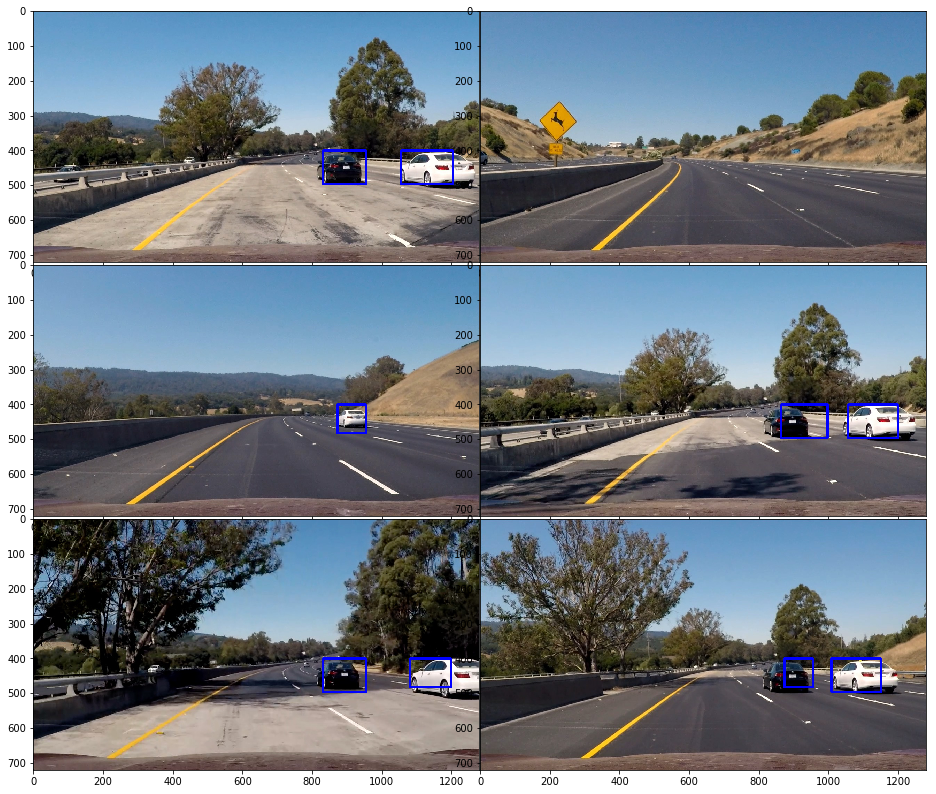

In [15]:
#Testing the full pipeline this time, without multiple_frames_state on the test images.
test_images =  glob.glob('./test_images/*.jpg')

fig, axs = plt.subplots(3, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(car_detection_pipeline(svc, X_scaler, orient, pix_per_cell, cell_per_block
                        , spatial_size, hist_bins,hog_channel, color_space,
                        spatial_feat, hist_feat, hog_feat, Multiple_Frames_State(90), 1, mpimg.imread(im)))

In [11]:
#Test the pipeline on a test video, using the multiple frames mechanism, saving back 90 frames.
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from functools import partial

test_out_file = 'test_video_out.mp4'
clip_test = VideoFileClip('test_video.mp4')

state = Multiple_Frames_State(90)
#Creating a partial function (inserting the hypter parameters and state), the resulting function only needs an image for input
#That way our state & hyper params is shared across repeated calling of this method.
car_detect = partial(car_detection_pipeline, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins
           , hog_channel, color_space, spatial_feat, hist_feat, hog_feat, state, 3)



clip_test_out = clip_test.fl_image(car_detect)
%time clip_test_out.write_videofile(test_out_file, audio=False)

[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4


 97%|████████████████████████████████████████▉ | 38/39 [00:10<00:00,  3.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

Wall time: 10.8 s


In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_out_file))

In [13]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from functools import partial
project_out_file = 'project_video_out.mp4'
clip_test = VideoFileClip('project_video.mp4')

state = Multiple_Frames_State(15)
#Creating a partial function (inserting the hypter parameters and state), the resulting function only needs an image for input
#That way our state & hyper params is shared across repeated calling of this method.
car_detect = partial(car_detection_pipeline, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins
           , hog_channel, color_space, spatial_feat, hist_feat, hog_feat, state, 3)


clip_test_out = clip_test.fl_image(car_detect)
%time clip_test_out.write_videofile(project_out_file, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|█████████████████████████████████████▉| 1260/1261 [05:35<00:00,  3.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 

Wall time: 5min 36s


In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_out_file))